### 생선 데이터를 이용하여 생선 분류하기

In [1]:
"""
< 생선 분류 >
 - 생선의 종류 : 도미와 빙어
 - 데이터 종류 : 무게와 길이
"""

'\n< 생선 분류 >\n - 생선의 종류 : 도미와 빙어\n - 데이터 종류 : 무게와 길이\n'

In [2]:
### 도미 데이터
# - 도미 길이(cm)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                        30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                        33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                        35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                        39.5, 41.0, 41.0]

# - 도미 무게(g)
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                        390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                        600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                        685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                        850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
print(len(bream_length), len(bream_weight))

35 35


### 1. 데이터의 분포 형태 확인하기

In [4]:
### 산점도 그래프 그리기 : scatter()
# - x축 : 길이, y축 : 무게
# - '길이가 길수록 , 무게가 커질까?'의 형태를 시각적으로 확인해보기

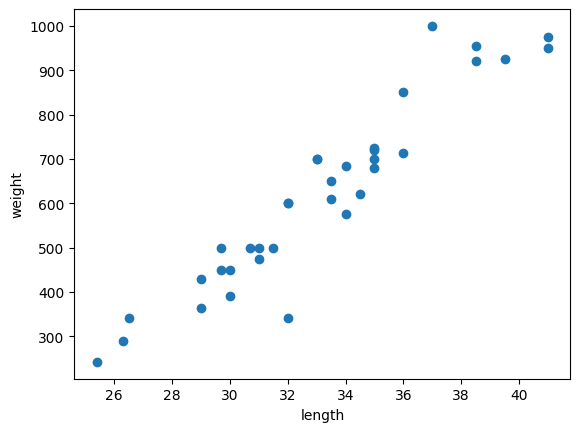

In [5]:
### 도미에 대한 산점도 그래프 그리기
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### (해석)
# - 길이가 길어질수록 무게가 커지는 특징을 가지고 있음
# - 양(+)의 상관관계를 나타내는 분포를 보이고 있음
# - 즉, 우상향 분포를 나타내고 있음
# - 분포의 형태는 선형을 나타내고 있음

### <데이터의 방향>
# - 우상향 : 왼쪽 아래에서 -> 오른쪽 위로 분포하는 형태 (정비례, +)
# - 우하향 : 왼쪽 위에서 -> 오른쪽 아래로 분포하는 형태 (반비례, -)

In [6]:
### 빙어 데이터
# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
    
# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
print(len(smelt_length), len(smelt_weight))

14 14


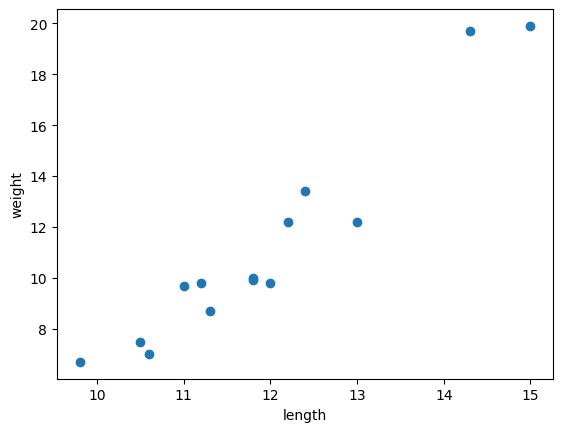

In [8]:
### 빙어 데이터 산점도 시각화
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### (해석)
# - 길이가 길어질수록 무게가 커지는 특징을 가지고 있음
# - 양(+)의 상관관계를 나타내는 분포를 보이고 있음
# - 즉, 우상향 분포를 나타내고 있음
# - 분포의 형태는 선형을 나타내고 있음

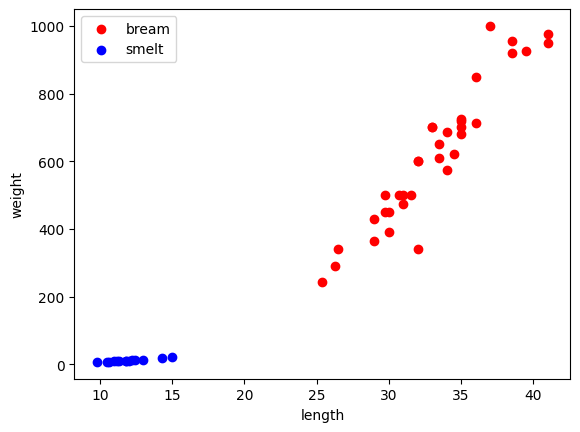

In [9]:
### 도미와 빙어의 산점도를 하나의 그래프로 시각화
# - 도미 데이터
plt.scatter(bream_length, bream_weight, c="red", label="bream")
# - 빙어 데이터
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

### (해석)
# - 도미와 빙어는 공통적으로 길이가 길수록, 무게가 커지는 현상을 보이고 있음
# - 다만, 빙어의 경우 도미에 비하여 무게가 길이에 영향을 많이 받지는 않음 (경사가 크지 않음)

# K-최근접 이웃 모델(KNN)

In [10]:
"""
<K-최근접 이웃 모델(KNN : K-Nearest Neighbors)>
 - 머신러닝에서 가장 간단한 모델
 - 비교용 모델로 주로 사용됨
 
<KNN이 처리하는 방식>
 - 예측값과 가장 가까운 이웃의 개수의 비율을 이용하여
 - 비율이 많은 쪽(다수가 있는 쪽)의 값으로 판단하는 방식을 사용함
"""

'\n<K-최근접 이웃 모델(KNN : K-Nearest Neighbors)>\n - 머신러닝에서 가장 간단한 모델\n - 비교용 모델로 주로 사용됨\n \n<KNN이 처리하는 방식>\n - 예측값과 가장 가까운 이웃의 개수의 비율을 이용하여\n - 비율이 많은 쪽(다수가 있는 쪽)의 값으로 판단하는 방식을 사용함\n'

In [11]:
### 모델을 통해 예측(판단)하기 위하여 데이터 하나로 통합하기
# - length(길이)와 weight(무게) 2개의 변수로 합치기
length = bream_length +smelt_length
weight = bream_weight + smelt_weight

In [12]:
print(len(length), len(weight))

49 49


In [13]:
print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


### 머신러닝에서 사용 가능한 데이터 형태로 만들기

In [14]:
### 2차원 데이터 : [[길이, 무게], [길이, 무게], [길이, 무게]]
# 변수 이름 : fish_data

### 내가 한거
fish_data = []
for i in range(len(length)) :
    list_0 = []
    list_0.append(length[i])
    list_0.append(weight[i])
    fish_data.append(list_0)

### 강사님
fish_data = [[l, w] for l, w in zip(length, weight)]
print(len(fish_data))
fish_data

49


[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [15]:
### 정답(target) 데이터 만들기
# - 지도학습 : 패턴을 스스로 찾게끔 하기 위하여 정답을 미리 알려줌
# - 도미의 개수와 빙어의 개수를 알고 있기 때문에
#   --> 각각의 [길이, 무게]의 인덱스 위치에 해당하는 정답을 만들어 줍니다.
# - 정답 데이터는 도미와 빙어 둘 중에 1가지만 분류하기 때문에
#   2개의 숫자값으로 만들어 줍니다.
# - 정답이 2개인 경우 : 이진분류(바이너리 분류)라고 하고,
#                           : 데이터는 0과 1의 데이터를 사용합니다.
# - 찾고자 하는 값을 기준으로 1을 부여합니다.
# - 우리는 도미를 찾겠다는 기준을 두고, 1을 부여할 것임
#   (기준은 누구 맘? 내 맘~)

In [16]:
### 데이터 용어 정의
# - 특성데이터 : 컬럼, 특징, 항목 데이터 모두 같은 의미의 용어
#                  : 일부 책에서는 x값 또는 input값 이라고도 합니다.
# - 타겟데이터 : 정답 데이터(일반적으로 1차원)
#                  : 일부 책에서는 y값 또는 target값 이라고도 합니다.
# - 특성데이터와 타겟데이터는 분리 시켜 관리함
# - 특성데이터 변수 : input = [[], [], []]
# - 타겟데이터 변수 : target = []
# ** input 및 target 데이터의 개수는 동일해야함

In [17]:
### 타켓(정답) 데이터 생성하기
# - 도미와 빙어의 데이터 개수 확인하기
print(len(bream_length), len(smelt_length))

35 14


In [18]:
### 특정데이터 전체 개수 확인하기
print(len(length))

49


In [19]:
### 타겟(정답) 1차원 데이터 생성하기
# - 변수명 : fish_target
# - fish_data의 인덱스 순서에 맞게 0~34까지는 1로(35개)
#                                         35~48까지는 0으로(14개)
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# KNN 머신러닝

In [20]:
"""
- 사용할 모델 : K-최근접이웃(KNN) 모델
- 사용할 패키지 : sklearn의 neighbors
- 사용할 클래스(모델) : Kneighbors(최근접이웃)Classifier(분류)
"""

'\n- 사용할 모델 : K-최근접이웃(KNN) 모델\n- 사용할 패키지 : sklearn의 neighbors\n- 사용할 클래스(모델) : Kneighbors(최근접이웃)Classifier(분류)\n'

In [21]:
### 사용할 라이브러리
from sklearn.neighbors import KNeighborsClassifier

In [22]:
### 1. 모델 생성하기(클래스 생성하기와 같은 의미)
# - 모델은 대부분 클래스로 구성됨
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [23]:
### 2. 모델 훈련시키기 -> 학습시키기
# - 훈련(학습) 시킨 모델을 -> 훈련(학습) 모델이라고 칭합니다.
# - fit() 함수 사용
# - fit(특성데이터, 정답데이터)
# - fit(독립변수, 종속변수)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [24]:
### 3. 훈련이 잘 되었는지 정확도 확인하기
# - 훈련 때 넣어준 데이터를 그대로 넣어주면? 100점 맞아야죠?
# - 정확도는 0~1 사이의 값으로 표현됨
# - 0 -> 0%, 1 -> 100%
# - 1에 가까울수록 정확도가 좋은 모델
#   (** 훈련이 잘된 모델이라고 해석합니다.)
# - 통계학에서는 1(100점)이 나오면 안됩니다.
#   (학계에서 인정을 안해줍니다.)
kn.score(fish_data, fish_target)

1.0

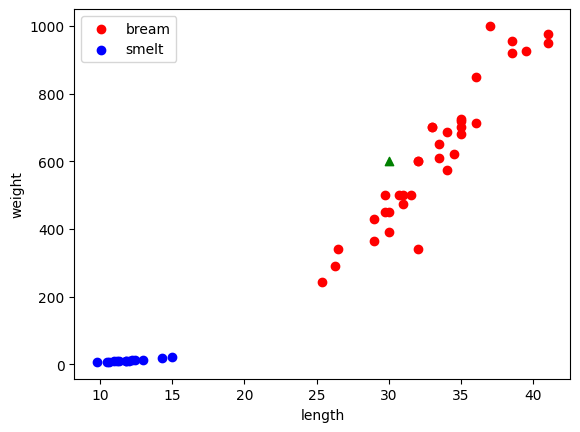

In [25]:
### 도미와 빙어의 산점도를 하나의 그래프로 시각화
# - 도미 데이터
plt.scatter(bream_length, bream_weight, c="red", label="bream")
# - 빙어 데이터
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")

# 임의의 생선 데이터 넣기
plt.scatter(30, 600, marker="^", c="green")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

In [26]:
### 4. 예측(분류)하기
# - 새로운 데이터(독립변수)를 훈련모델에 넣었을 때
# - 예측(분류) 값 -> target값 확인
# - predict() 사용
# - 예측(분류)할 때 데이터는 2차원 형태의 독립변수로 만들어야함
kn.predict([[30, 600]])

array([1])

In [27]:
### KNN 훈련시킨 모델이 훈련에 사용한 독립변수를 잘 가지고 있는지 확인하기
# - _fit_X : 훈련에 사용된 독립변수(X는 대문자)
print(kn._fit_X)
- 
# - _y : 훈련에 사용된 종속변수(y는 소문자)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


# K-NN 정리

In [28]:
"""
<K-NN(k-최근접 이웃 모델)>
 - 가장 가까운 직선 거리의 값을 찾아주는 알고리즘을 사용하는 모델
 - 가장 가까운 직선의 거리 -> 누구와 가까울까?
"""

'\n<K-NN(k-최근접 이웃 모델)>\n - 가장 가까운 직선 거리의 값을 찾아주는 알고리즘을 사용하는 모델\n - 가장 가까운 직선의 거리 -> 누구와 가까울까?\n'

In [29]:
### K-NN 모델 생성하기(이웃의 개수 정의하기)
# - n_neighbors : 이웃의 개수 정의
# - 특정값이 주변의 직선거리로 가장 가까운 20개의 값과 비교가 됨
# - 20개를 target 데이터의 0과 1 중에 어느쪽의 분포가 많은지로 판단함
kn49 = KNeighborsClassifier(n_neighbors=20)
kn49

KNeighborsClassifier(n_neighbors=20)

- 훈련부터~정확도 확인까지 진행해주세요

In [30]:
### 훈련시키기
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [31]:
### 정확도 확인하기
kn49.score(fish_data, fish_target)

0.9795918367346939

In [32]:
### 예측하기
kn49.predict([[30, 600]])

array([1])

### 하이퍼파라메터 튜닝하기

In [33]:
"""
<하이퍼파라메터>
 - 모델의 속성 중에 사람이 직접 입력해주는 변수들을 하이퍼파라메터라고 칭합니다.
 - 하이퍼파라메터에 값을 임의로 넣을 수 없기 때문에 찾아내야 하는데,
 - 찾아내는 과정을 튜닝이라고 합니다.
"""

'\n<하이퍼파라메터>\n - 모델의 속성 중에 사람이 직접 입력해주는 변수들을 하이퍼파라메터라고 칭합니다.\n - 하이퍼파라메터에 값을 임의로 넣을 수 없기 때문에 찾아내야 하는데,\n - 찾아내는 과정을 튜닝이라고 합니다.\n'

In [34]:
### n_neighbors 하이퍼파라메터 튜닝하기
# - 가장 적합한 n_neighbors의 값 찾아내기
"""
<n_neighbors 값을 찾기 위한 조건>
 - 종속변수의 범주(0 또는 1)의 갯수에 따라서 짝수, 홀수 값의 기준을 정해야 함
   (현재 종속변수는 0과 1 둘 중 하나이기에 홀수의 n_neighbors 값을 생성해야 함)
   (0과 1의 비율로 분류하기 때문에..)
 - 정확도(score)는 1보다 작아야 함
 - n_neighbors는 1보다 작을 때의 가장 높은 정확도를 나타내는 시점의 개수를 추출해서 사용
"""

'\n<n_neighbors 값을 찾기 위한 조건>\n - 종속변수의 범주(0 또는 1)의 갯수에 따라서 짝수, 홀수 값의 기준을 정해야 함\n   (현재 종속변수는 0과 1 둘 중 하나이기에 홀수의 n_neighbors 값을 생성해야 함)\n   (0과 1의 비율로 분류하기 때문에..)\n - 정확도(score)는 1보다 작아야 함\n - n_neighbors는 1보다 작을 때의 가장 높은 정확도를 나타내는 시점의 개수를 추출해서 사용\n'

In [35]:
### n_neighbors의 값을 정의하는 방법
# - 클래스 생성 시 n_neighbors의 값을 함께 넣어줄 수 있음
# - 클래스 생성 후 별도로 n_neighbors의 값을 정해줄 수도 있음
#   (예시 : kn.n_neighbors = 20)

In [36]:
kn.n_neighbors = 40
kn.score(fish_data, fish_target)

0.7142857142857143

In [37]:
kn.n_neighbors = 5
kn.score(fish_data, fish_target)

1.0

In [38]:
a = 0

for v in range(3, 50, 2) :
    kn.n_neighbors = v
    b = kn.score(fish_data, fish_target)
    
    if b <1 :
        if a < b :
            a = b
            print(v, a)

19 0.9795918367346939


In [39]:
### 강사님
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

### 정확도가 높은 시점의 데이터를 담을 변수 생성
nCnt = 0
nScore = 0.0

for n in range(3, len(fish_data), 2) :
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    
    if score < 1 :
        if nScore < score :
            nCnt = n
            nScore = score
            
print(nCnt, nScore)

19 0.9795918367346939


In [40]:
kn.n_neighbors = 19
kn.score(fish_data, fish_target)

0.9795918367346939